In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import IPython.display as display
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from fashion_cnn import coco_main
from mrcnn.model import log

import skimage.io
import cv2

# import imp
# imp.reload(utils)
from utils import DominantColors
from sklearn.cluster import KMeans

Using TensorFlow backend.


root_dir: C:\tensor_code\fashion
model_dir: C:\tensor_code\fashion\model
log_dir: C:\tensor_code\fashion\logs


In [3]:
%matplotlib inline

In [4]:
COCO_MODEL_PATH ='../model/mask_rcnn_coco_0_87_1_0069.h5'
MODEL_DIR = '../model'
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"


config = coco_main.FashionConfig()
dataset = coco_main.FashionDataset()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    BACKBONE='resnet101'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

print("Loading weights ", COCO_MODEL_PATH)
model.load_weights(COCO_MODEL_PATH, by_name=True)    

W0224 16:00:59.158328 12504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0224 16:00:59.179272 12504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0224 16:00:59.214180 12504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                26
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

W0224 16:00:59.359791 12504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0224 16:00:59.372756 12504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0224 16:01:11.520266 12504 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0224 16:01:13.140931 12504 deprecation_wrapper.py:119] From ..\mrcnn\model.py:631: The name tf.log is deprecated. Please use tf.math.log instead.

W0224 16:01:13.172863 12504 deprecation.py:323] From ..\mrcnn\model.py:689: add_dispatch_support.<locals>.wrapper (

Loading weights  ../model/mask_rcnn_coco_0_87_1_0069.h5


In [5]:
json_file_dir = "C:/tensor_code/fashion/dataset/deepfashion2/train/coco_train_2.json"  # TODO: enter value here
image_dir="C:/tensor_code/fashion/dataset/deepfashion2/train/2"
dataset.load_coco(json_file_dir=json_file_dir,image_dir=image_dir)

# Must call before using the dataset
dataset.prepare()

loading annotations into memory...
Done (t=16.84s)
creating index...
index created!


In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [25]:
image=skimage.io.imread('../dataset/deepfashion2/train/2/038463.jpg')

results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (750, 750, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


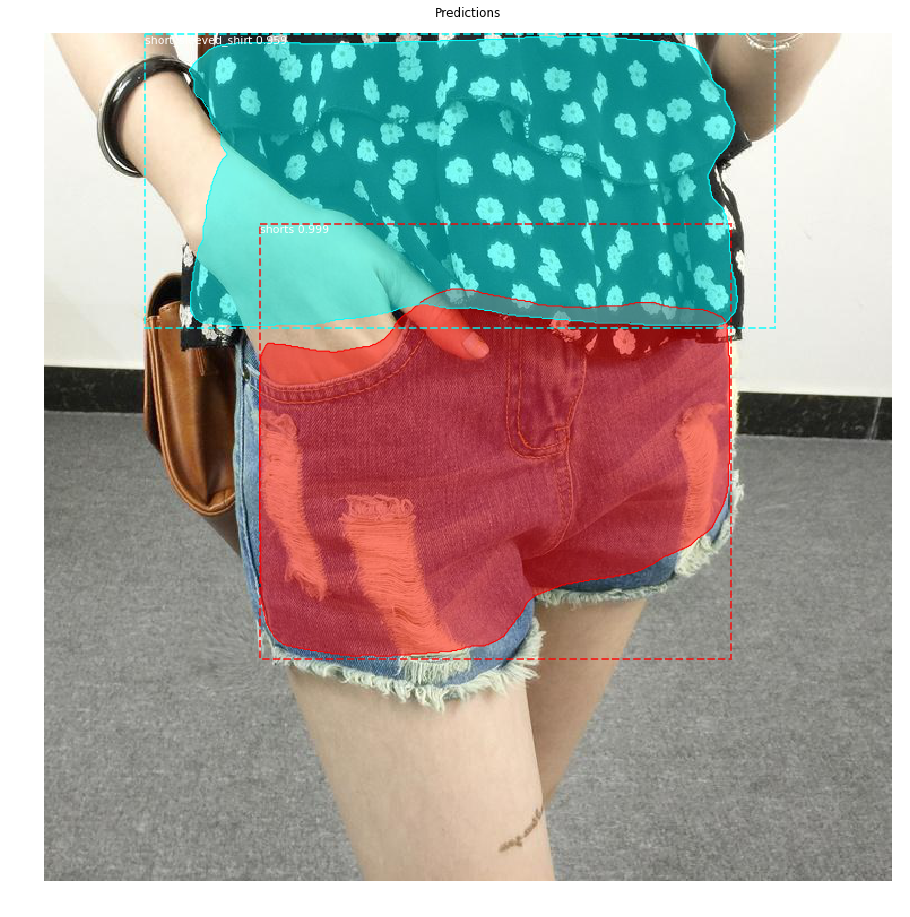

In [26]:
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

In [27]:
def extract_color(image,mask):
    '''mask:(h,w,n), return :np.array[[r1,b1,g1],[r2,b2,g2],...]'''
    
    num=mask.shape[2]
    colors=[]
    
    for i in range(num):
        single_mask=mask[:,:,i]
        
        dom_color=main_color(image,single_mask)
        colors.append(dom_color)
        
    return np.array(colors)
    
def main_color(image,single_mask):
    
    cluster=3
    
    masked_image=image[single_mask]

    dec=DominantColors(masked_image,cluster)
    dom_color=dec.dominantColors()[0]
 
    return dom_color
    

In [154]:
prediction_id=0
mask=results[0]['masks'][:,:,prediction_id]
print(mask.shape)
category_id=results[0]['class_ids'][prediction_id]
category_name=dataset.class_names[category_id]

clusters = 10

roi_idx=results[0]['rois'][prediction_id]
cropped_img=image[roi_idx[0]:roi_idx[2],roi_idx[1]:roi_idx[3],:]

masked_image=image[mask]
dc = DominantColors(masked_image,clusters) 

pants_color = dc.dominantColors()

(750, 750)


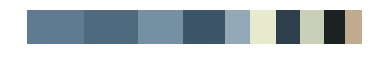

In [155]:
dc.plotHistogram()

In [181]:
prediction_id=1
mask=results[0]['masks'][:,:,prediction_id]
category_id=results[0]['class_ids'][prediction_id]
category_name=dataset.class_names[category_id]

clusters = 3

roi_idx=results[0]['rois'][prediction_id]
cropped_img=image[roi_idx[0]:roi_idx[2],roi_idx[1]:roi_idx[3],:]

masked_image=image[mask]
dc = DominantColors(masked_image,clusters) 

tshirt_color = dc.dominantColors()

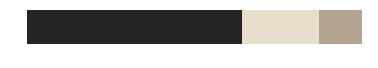

In [182]:
dc.plotHistogram()

## Dominant Color Based on Color Count

In [183]:
color_count={}
for i in masked_image:
    rgb_tuple=tuple(i)
    if rgb_tuple not in color_count.keys():
        color_count[rgb_tuple]=1
    else:
        color_count[rgb_tuple]+=1

In [184]:
main_color=sorted(color_count.items(),key=(lambda x:x[1]),reverse=True)

In [225]:
hi=np.array(main_color)[:10,0]
hi= [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in kmeans.cluster_centers_]

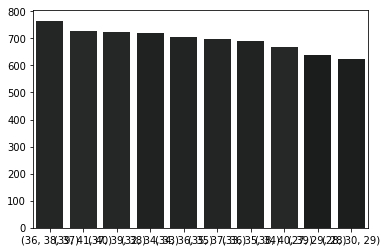

In [186]:
sns.barplot(np.array(main_color)[:10,0],np.array(main_color)[:10,1],palette=hi)

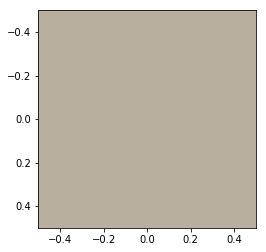

In [259]:
## Applyting K-means on 100 colors

from sklearn.cluster import KMeans

n_colors=len(main_color)//3
trial=np.array(main_color)[:n_colors,0]
haha=list(map(lambda x:np.array(x),trial))
kmeans = KMeans(n_clusters=3, random_state=0).fit(haha)
lala=kmeans.cluster_centers_
plt.imshow([[lala[0].astype(int)]])

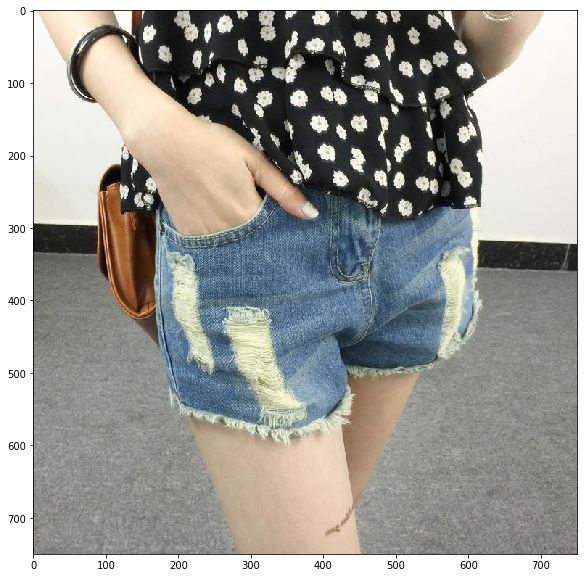

In [189]:
plt.figure(figsize=(10,10))
plt.imshow(image)

### RGB to HSV

In [62]:
def plotHistogram(colors):
    '''N*3 : numpy'''
    categories=colors.shape[0]
    #creating empty chart
    chart = np.zeros((500, 100, 3), np.uint8)
    start = 0
    spaces=int(500/categories)

    #creating color rectangles
    for i in range(categories):
        end = start + spaces

        #getting rgb values
        r = int(colors[i][0])
        g = int(colors[i][1])
        b = int(colors[i][2])

        #using cv2.rectangle to plot colors
        cv2.rectangle(chart, (0,int(start)), (100,int(end)), (r,g,b), -1)
        start = end	

    #display chart
    plt.figure()
    plt.axis("off")
    plt.imshow(chart)
    plt.show()


In [63]:
combination=np.vstack([tshirt_color[0],pants_color[0]])

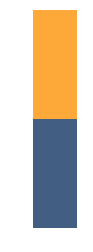

In [66]:
plotHistogram(combination)

In [224]:
from matplotlib.colors import rgb_to_hsv,hsv_to_rgb
import cv2
import math


class var_color:
   
    def __init__(self,norm_rgb,n=4):
        '''norm_rgb:(3,) ; returns (n,3) normed_hsv'''
       
        self.norm_rgb=norm_rgb
        self.n=n
        self.hsv_color=rgb_to_hsv(norm_rgb)
        self.hsv_dict={'h':0,'s':1,'v':2}
        
        
    def change_color(self,hsv):
        '''h or s or v:str, return hsv(n,3)'''
        hsv_dict={'h':0,'s':1,'v':2}
        idx=self.hsv_dict[hsv]
        
        sim=np.array([self.hsv_color for i in range(self.n)])
        sim_change=self.find_range(self.hsv_color[idx])
        sim[:,idx]=sim_change
        
        rgb_color=hsv_to_rgb(sim)
        
        return sim,rgb_color

    def find_range(self,hsv):
        '''one of hsv'''
        bound=min(1-hsv,hsv)
        space=bound/2
        hsv_range=np.linspace(hsv-space,hsv+space, num=self.n)
        return hsv_range
    
def show_com(norm_rgb,change_rgb):
    '''norm_rgb:normed_rgb:(3,),change_rgb:(5,3):normed_hsv_value'''

    nums=change_rgb.shape[0]
    chart = np.zeros((200, 200, 3), np.uint8)
    start = 0
    spaces=int(200/nums)

    cv2.rectangle(chart,(0,0),(200,100),norm_rgb*255,-1)
    waterfall_color_rgb=hsv_to_rgb(change_rgb)*255

    #creating color rectangles
    for i in range(nums):
        end = start + spaces

    #     #getting rgb values
    #     r = int(waterfall_color[i][0])
    #     g = int(waterfall_color[i][1])
    #     b = int(waterfall_color[i][2])

        #using cv2.rectangle to plot colors
        cv2.rectangle(chart, (int(start),100), (int(end),200), waterfall_color_rgb[i],-1)
        start = end

    #display chart
    plt.figure()
    plt.axis("off")
    plt.imshow(chart)


### rgb값 읽어서 hsv 바꿔주고 다시 rgb return

norm_rgb=combination[1]/255
class_color=var_color(norm_rgb)
sat_color=class_color.change_color('s')
hue_color=class_color.change_color('h')
value_color=class_color.change_color('v')

In [225]:
list(map(lambda x:matplotlib.colors.to_hex(x),(class_color.change_color('h')[1].tolist())))

['#428258', '#427882', '#424482', '#744282']

In [204]:
a={'a':1,'b':2,'c':3}

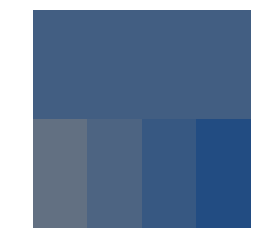

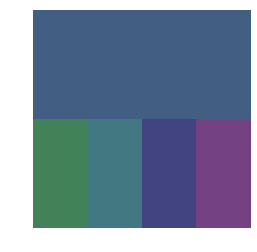

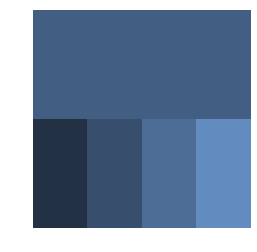

In [201]:
show_com(norm_rgb,sat_color)
show_com(norm_rgb,hue_color)
show_com(norm_rgb,value_color)

## 개인의 옷장

### 1. Input : 개인 옷들
1. classification 상의 하의 
2. 상의 하의 별로 main color 분석

2020 SS 컬러 참고사이트 : https://www.whowhatwear.com/spring-summer-color-trends-2020/slide4

In [11]:
ss_color={'CD212A':[205,33,42],'798EA4':[121,142,164],'47C6A3':[71,198,163],'f88379':[248,131,121],'f4c430':[244,196,48], \
         '4A5335':[74,83,53],'FFFFFF':[255,255,255]}
color_name={'flame scarlet':'CD212A','faded denim':'798EA4','biscay green':'47C6A3','coral pink':'f88379','saffron':'f4c430', \
         'chive':'4A5335','white':'FFFFFF'}